# Tutorial 3: Stochastic Simulations 

© 2020 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)   

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

--- 

In this tutorial, we will cover the basics of writing stochastic simulations and their application to biological phenomena ranging from the diffusion of molecules to genetic drift in populations.

## What is a stochastic simulation? 

In science, we are often more interested in the distribution of a set of outcomes rather than a single event. This may be the probability distribution of a molecule diffusing a specific distance as a function of time, the distribution of mRNA molecules per cell produced from a constitutively expressing promoter, or the probability distribution of a model parameter given a collection of data. [Stochastic simulations](https://en.wikipedia.org/wiki/Stochastic_simulation) allow us to generate a series of simulations of a system in which one step (such as the direction a molecule will diffuse) is governed by random chance. These simulations often boil down to flipping a coin to dictate if said step will occur or not. 

Of course, sitting in your office chair flipping a US quarter over and over again is not how one should do a simulation. To get a sense of the probability distribution of some outcome, we often have to simulate the process thousands of times. This means that we need to know how to make our computers do the heavy lifting. 

It's often easy to forget just how powerful modern computers can be. What once required a serious computational cluster only twenty years ago can now be done on a 10 mm thick compartment made of rose-gold colored aluminium. In the following exercise, we will demonstate how you can learn about the behavior of biological systems from the comfort of your laptop in only half a screen of code. 

## Example I: The Random Walk 

Think of a molecule that moves either left or right with equal step probabilities at each subsequent time point. We can decide whether to walk left or right by flipping a coin and seeing if it comes up 'heads' or 'tails'. 

In [2]:
# Flip a coin three times.
flip_1 = np.random.rand()
flip_2 = np.random.rand()
flip_3 = np.random.rand()
print(flip_1, flip_2, flip_3)

0.11348451844650365 0.9502625158874127 0.18767474769404335


Note that this will change every time that we run the code cell. How do we convert this to a 'heads' and 'tails' readout? We can assume that this is a totally fair coin. This means that the probability of getting "heads" to come up $P_H$ is the same as flipping a "tails" $P_T$ such that $P_H + P_T = 1$. This means that for a fair coin, $P_H = P_T = 0.5$. To convert our coin flips above, we simply have to test if the flip is above or below $0.5$. If it is below, we'll say that the coin was flipped "heads", otherwise, it is "tails".

In [3]:
# Convert our coinflips to heads and tails.
flips = [flip_1, flip_2, flip_3]
for flip in flips:
    if flip < 0.5:
        print("Heads")
    else: 
        print("Tails")

Heads
Tails
Heads


Now imagine that we wanted to flip the coin one thousand times. Obviously, we shouldn't write out a thousand variables and then loop through them. We could go through a loop for one thousand times and flip a coin at each step or flip one thousand coins at once and store them in an array. In the interest of simplicity, we'll go with option one. Let's flip a coin one thousand times and compute the probability of getting "heads".

In [5]:
# Test that our coin flipping algorithm is fair.
n_flips = 1000
p = 0.5  # Our anticipated probability of a heads.

# Flip the coin n_flips times.
flips = np.random.rand(n_flips)

# Compute the number of heads.
heads_or_tails = flips < p  # Will result in a True (1.0) if heads.
n_heads = np.sum(heads_or_tails)  # Gives the total number of heads.

# Compute the probability of a heads in our simulation.
p_sim = n_heads / n_flips
print(f'Predicted p = {p}. Simulated p = {p_sim}')

Predicted p = 0.5. Simulated p = 0.505


In the above code cell, we've also introduced a way to format strings using the `{}` formatter. We can specify that a value should inserted at a given position as a string by typing the name of the value in curly braces. At the beginning of the string, before the opening `'`, we've added an `f` which indicates that the string is to be formatted. 

We see that our simulated probability is very **close** to our imposed $P_H$, but not exactly. This is the nature of stochastic simulations. It's based on repeated random draws. If we were to continue to flip a coin more times, our simulated $P_H$ would get closer and closer to $0.5$. This is why doing many repetitions of stochastic simulations is necessary to generate reliable statistics. 

So how do we relate this to diffusion? We'll start at position zero and flip a coin at each time step. If it is less than 0.5, we'll take a step left. Otherwise, we'll take a step to the right. At each time point, we'll keep track of our position and then plot our trajectory. 

In [6]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1000   # Essentially time.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()
    
    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.
        
    # Update our position based off of where we were in the last time point. 
    position[i] = position[i-1] + step

Notice that at the beginning of our `for` loop, we specified our `range` to be from `1` to `n_steps`. This is because the first entry (index `0`) of our `position` vector is our starting position. Since we update our position at timepoint `i` based off of where we were at time step `i - 1`, we have to start at index `1`. 

Now that we've taken the random walk, let's plot it. We'll take a look at where our molecule was at each time point.

Text(0, 0.5, 'position')

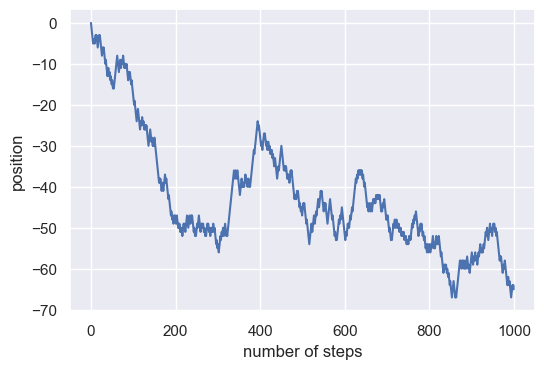

In [11]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.figure(dpi=100) # Instantiate the figure with high resolution
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position')

Again, since our steps are based on the generation of random numbers. This trajectory will change every time you run the code. As we discussed earlier, the power of stochastic simulation comes from doing them many times over. Let's write our random walk code again one thousand times and plot all of the traces. 

In [13]:
# Perform the random walk 1000 times. 
n_simulations = 1000

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Redefine our step probability just to be clear. 
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step. 
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()
        
        # Figure out how to step.
        if flip < step_prob:
            step = -1
        else:
            step = 1
            
        # Update our position.
        position[i, j] = position[i, j-1] + step

You'll notice that this cell took a little bit longer to run than the previous one. This is because we are doing the simulation a thousand times over! To show the random walks, we'll plot all of the trajectories over each other as thin lines.  

Text(0, 0.5, 'position')

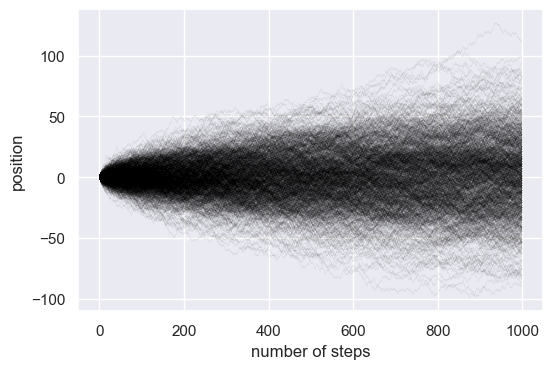

In [17]:
# Plot all of the trajectories together.
plt.figure(dpi=100)
for i in range(n_simulations):
    # Remembering that `position` is just a two-dimensional matrix that is 
    # n_simulations by n_steps, we can get each step for a given simulation 
    # by indexing as position[i, :].
    plt.plot(steps, position[i, :], color='black', linewidth=0.3, alpha=0.1) 
    
# Add axis labels.
plt.xlabel('number of steps')
plt.ylabel('position')

Pretty cool!  We can look at the distribution of positions at various steps in time by making histograms of the positions of each simulation. Let's take a look at the distribution of positions at $t = 200$ steps.

(-100, 100)

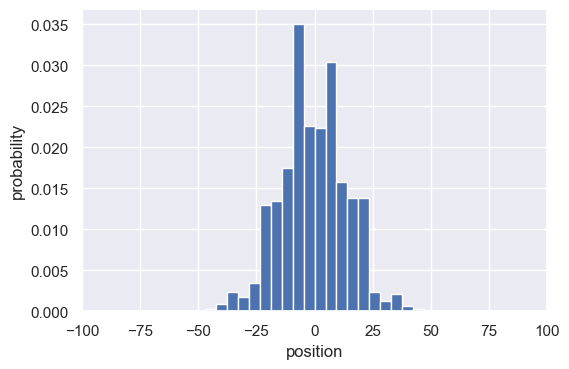

In [18]:
# Make a histogram of the positions. To look at t=200, we have to index at 
# 199 because indexing starts at 0  in Python. We'll also normalize the 
# histogram (density=True) so we can get a measure of probability.
plt.figure(dpi=100)
plt.hist(position[:, 199], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range. 
plt.xlim([-100, 100])

We see that this qualitatively appears to be Gaussian. If we had to guess, we could say that the mean looks like it is right at about zero. Let's take a look at the distribution of positions at the last time point as well. 

(-100, 100)

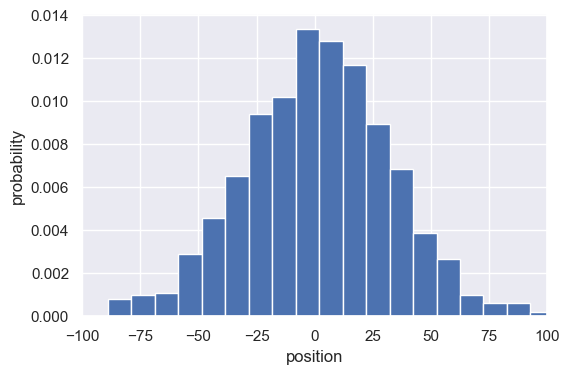

In [19]:
# Make a histogram of the position distribution at the last time step. We could
# just index at 999, but indexing at -1 will always return the distribution at
# the last time step, whatever that may be. 
plt.figure(dpi=100)
plt.hist(position[:, -1], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')
plt.xlim([-100, 100])

Again, this distribution looks somewhat Gaussian with a mean of approximately zero. We can actually compute the mean position from our simulation by iterating through each time step and simply computing the mean. Let's plot the mean at each time point as a red line. 

Text(0, 0.5, 'position')

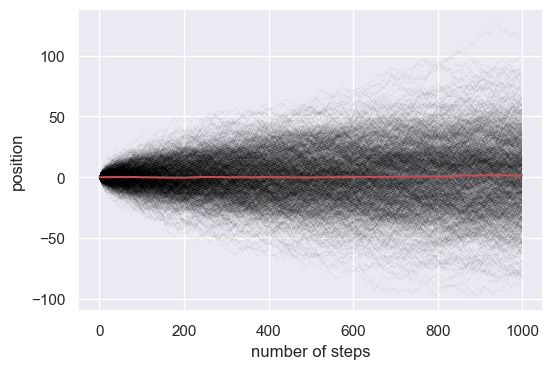

In [21]:
# Compute the mean position at each step and plot it. 
mean_position = np.zeros(n_steps)
for i in range(n_steps):
    mean_position[i] = np.mean(position[:, i])

# Plot all of the simulations.
plt.figure(dpi=100)
for i in range(n_simulations):
    plt.plot(steps, position[i, :], color='black', linewidth=0.2, alpha=0.1)
    
# Plot the mean as a thick red line. 
plt.plot(steps, mean_position, 'r-')

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position')

While the mean position is zero, the mean squared displacement is not quite so trivial. Let's compute this value and plot it as a function of the number of steps. 

(0, 1100)

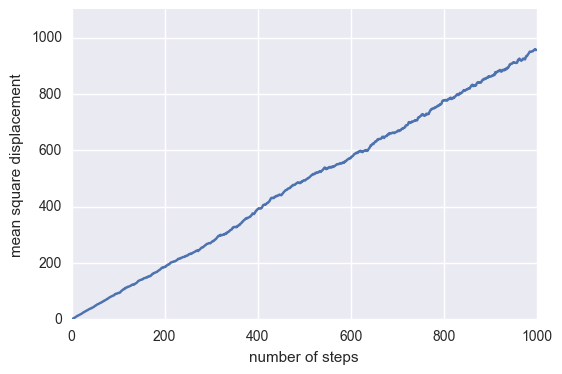

In [21]:
# Compute the mean squared displacement.
msd = np.zeros(n_steps)
for i in range(n_steps):
    msd[i] = np.mean(position[:, i]**2)

# Plot the mean squared as a function of the number of steps.
plt.figure(dpi=100)
plt.plot(steps, msd)
plt.xlabel('number of steps')
plt.ylabel('mean square displacement')
plt.ylim([0, 1100]) 

That certainly looks like it scales linearly with the number of steps, just as we predicted. 


Of course, stochastic simulations are useful for far more than just playing around with diffusion. Let's take a look at a different (but behaviorally similar!) example -- the allele frequency of an evolving population. 

## Example II: Genetic Drift 

It is estimated that prior to 1870, the native population of the [American bison (*Bison bison bison*)](https://en.wikipedia.org/wiki/American_bison) numbered in the tens of millions. Less than twenty years later, there were only around 100 individuals left on the continent. It wasn't disease, starvation, or some natural disaster that pushed them to the brink of nonexistence. Rather, this remarkable extermination was due to unregulated (an often encouraged) hunting of bison by the westward settlers for food, skins and sport. Individual hunting expeditions could result in several thousands being killed in just a few days. The photo below shows a pile of *B. b. bison* skulls prior to being ground for fertilizer in the mid 1870s.

<center>
<img src="american_bison_pile.jpg" width=60%>
</center>

Today, the population has bounced back to approximately 500,000 individuals. This is due in part to a conservation effort by a handful of ranchers in what is now Yellowstone National Park. The road to recovery was not smooth - this population further dwindled to only 25 individuals in 1902. With such a small population size, allele frequencies felt the impressive power of genetic drift. See [this review by Philip W. Hedrick](https://academic.oup.com/jhered/article/100/4/411/858147/Conservation-Genetics-and-North-American-Bison) for a more detailed study of the conservation effort of the American bison and the unexpected intrusion of cattle ancenstry into the current bison population.

To explore the influence of genetic drift on the return of the American bison we'll use our newfound talents in stochastic simulations to track the frequencies of two hypothetical alleles. To simplify our analysis, we'll make some assumptions about the recovering Yellowstone National Park herd in 1902. 

1. There is a set of alleles ($A$ and $a$) in the population which have distinct phenotypes. 
2. The size of the population is fixed across generations. This means that when a new individual is born, one dies and is removed from the breeding population.
3. All breeding is totally random, meaning that there is no sexual selection. 
4. There is no selection or mutation.

While we'll relax point #4 in this week's homework, these stipultions will allow us to examine how drift can strongly influence evolution. To do so, we will simulate this randomly breeding population over many generations and keep track of the allele frequency of the $A$ allele. 

We can construct this simulation just like we did with a random walk with one important change.

**In a randomly breeding population, the allele frequency of one generation is dependent on its frequency in the previous generation.** This would be analogous to our coin developing a bias in our flip where the probability of 'heads' is dependent on the frequency of 'heads' obtained in the previous generation. But maybe a better analogy would be as follows: Imagine a jar with black and white marbles which represent each of the alleles. This jar will represent our toy model for random mating. On each generation we draw a marble at random, register which color was it, and then **put it back into the jar** (this means we are doing random sampling *with replacement*). If at generation $t$ you started with $N_A^{(t)}$ black marbles and $N_a^{(t)}$ white marbles, the chance of drawing a black marble was simply
$$
p_A(t) = \frac{N_A^{(t)}}{N_{tot}}
\tag{1}
$$
where $N_{tot} = N_A^{(t)} + N_a^{(t)}$ is the total number of alleles that we assume remains constant over generations. The main difference with the random walk studied above is that for the particle diffusing this $p_A(t)$ would have remained constant for each step. But for alleles in random mating this has to change according to how many black and white marbles we draw on the previous generation. This means that if we ended up with $N_A^{(t+1)}$ black marbles at generation $t+1$, the probability for the following generation would then be given by
$$
p_A(t+1) = \frac{N_A^{(t+1)}}{N_{tot}}
\tag{2}
$$

Therefore for our allele segregation simulation we will flip $N_{tot}$ coins at a time (this will speed up our simulation slightly), and update the coin bias after each simulation round. 

In [24]:
# Define some parameters of the simulation.
pop_size = 25  # Number of individuals in the population.
n_alleles = 2 * pop_size  # Total number of alleles in the population. 
n_gen = 130 # Number of generations to track the allele frequencies.
freq = 0.5  # Allele frequency of allele A.

# Set up a vector to store the allele frequency at each generation.
frequency = np.zeros(n_gen)  # Full of zeros.

# Set the initial condition.
frequency[0] = freq

# Loop through the generations. 
for i in range(1, n_gen):
    # Flip a coin for each member of the population.
    flips = np.random.rand(n_alleles)
    
    # Determine if each allele is 'A' or 'a' based on the frequency from
    # the previous generation.
    num_A = np.sum(flips < frequency[i-1])
    
    # Determine the new allele frequency.
    new_freq = num_A / n_alleles
    
    # Store the new allele frequency.
    frequency[i] = new_freq

As we did in the random walk, let's take a look at the trajectory of this single population. 

(0, 1)

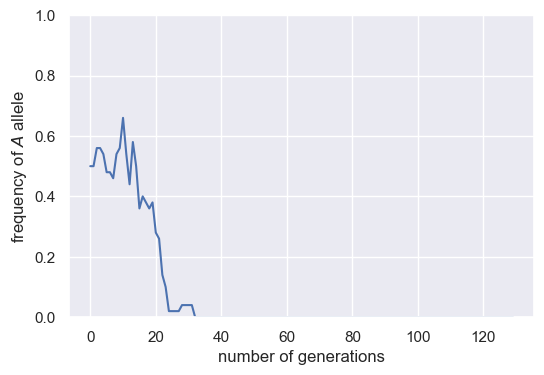

In [25]:
# Set up a vector for the number of generations.
gen_vec = np.arange(0, n_gen, 1)

# Plot this single trajectory.
plt.figure(dpi=100)
plt.plot(gen_vec, frequency)

# Add axis labels.
plt.xlabel('number of generations')
plt.ylabel('frequency of $A$ allele')

# Change the ylimits to cover the full range of possible frequencies.
plt.ylim([0, 1])

Again, as this is a stochastic simulation, the trajectory will look different each time we run the simulation. Notice that in most simulations, the allele frequency goes to either 1.0 or 0.0. At this point, the allele is **fixed** meaning that there are no other copies of the allele available for breeding. Every once in a while, you'll see a trajectory that doesn't reach fixation. 

As we saw in the example of the random walk, it's difficult to get a feeling for a stochastic process by looking at only one example. Let's expand this simulation to examine the behavior of the small handful of herds present in the late 1880s. 

In [29]:
# Expand the simulation to cover all 5 recovering herds of bison. 
n_herds = 5
frequency = np.zeros((n_herds, n_gen))

# Loop through each herd and repeat the simulation.
for i in range(n_herds):
    # Set the initial frequency.
    frequency[i, 0] = 0.5
    for j in range(1, n_gen):
        # Flip the coins.
        flips = np.random.rand(n_alleles)
        
        # Find the number of 'A' alleles.
        num_A = np.sum(flips < frequency[i, j-1])
        
        # Determine the new frequency
        new_freq = num_A / n_alleles
        
        # Set the current allele frequency.
        frequency[i, j] = new_freq


Let's plot 'em!

(0, 1)

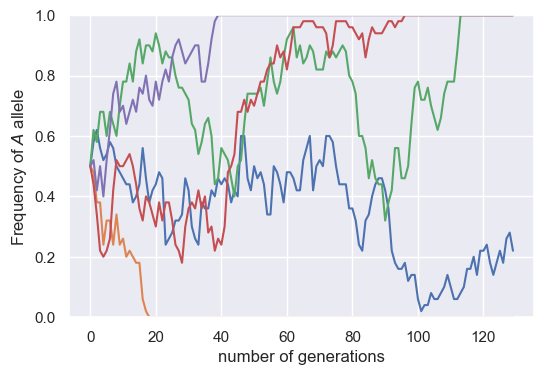

In [30]:
# Plot the trajectories from all of the herds.
plt.figure(dpi=100)
for i in range(n_herds):
    plt.plot(gen_vec, frequency[i, :])
    
# Add axis labels.
plt.xlabel('number of generations')
plt.ylabel('Frequency of $A$ allele')
plt.ylim([0, 1])

We can see that some populations reached fixation of 1.0, some 0.0, and one of them didn't reach fixation at all. 

##  In conclusion...

In this tutorial, we've introduced a set of skills that will be useful in whatever field of science you choose to pursue. The ability of writing simulations allows you to get a feeling for the behavior of a physical system without necessarily having to grind through an analytical solution. While we covered only two examples of one-dimensional stochastic simulations, these same principles can be applied to many other types questions. 